# Matching between two images

In [1]:
import tools.load as ld
import cv2
import matplotlib.pyplot as plt

In [2]:
imgs = ld.load_images("orebro1")

In [19]:
imgList = list( imgs.values() )
imgA = imgList[0]
imgB = imgList[3]

In [20]:
detector = cv2.xfeatures2d.SIFT_create()

def get_features(img):
    kp, desc = detector.detectAndCompute(img, None)
    #img_kp = cv2.drawKeypoints(imgA, kp, imgA)
    return kp, desc

In [21]:
kpA, descA = get_features(imgA)
kpB, descB = get_features(imgB)

In [22]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
bf = cv2.FlannBasedMatcher_create()

matches = bf.match(descA, descB)
matches = sorted(matches, key= lambda x: x.distance)


#img_matches = cv2.drawMatches(imgA, kpA, imgB, kpB, matches[:10], kpB)

#plt.figure(figsize=(20,10))
#plt.imshow(img_matches)

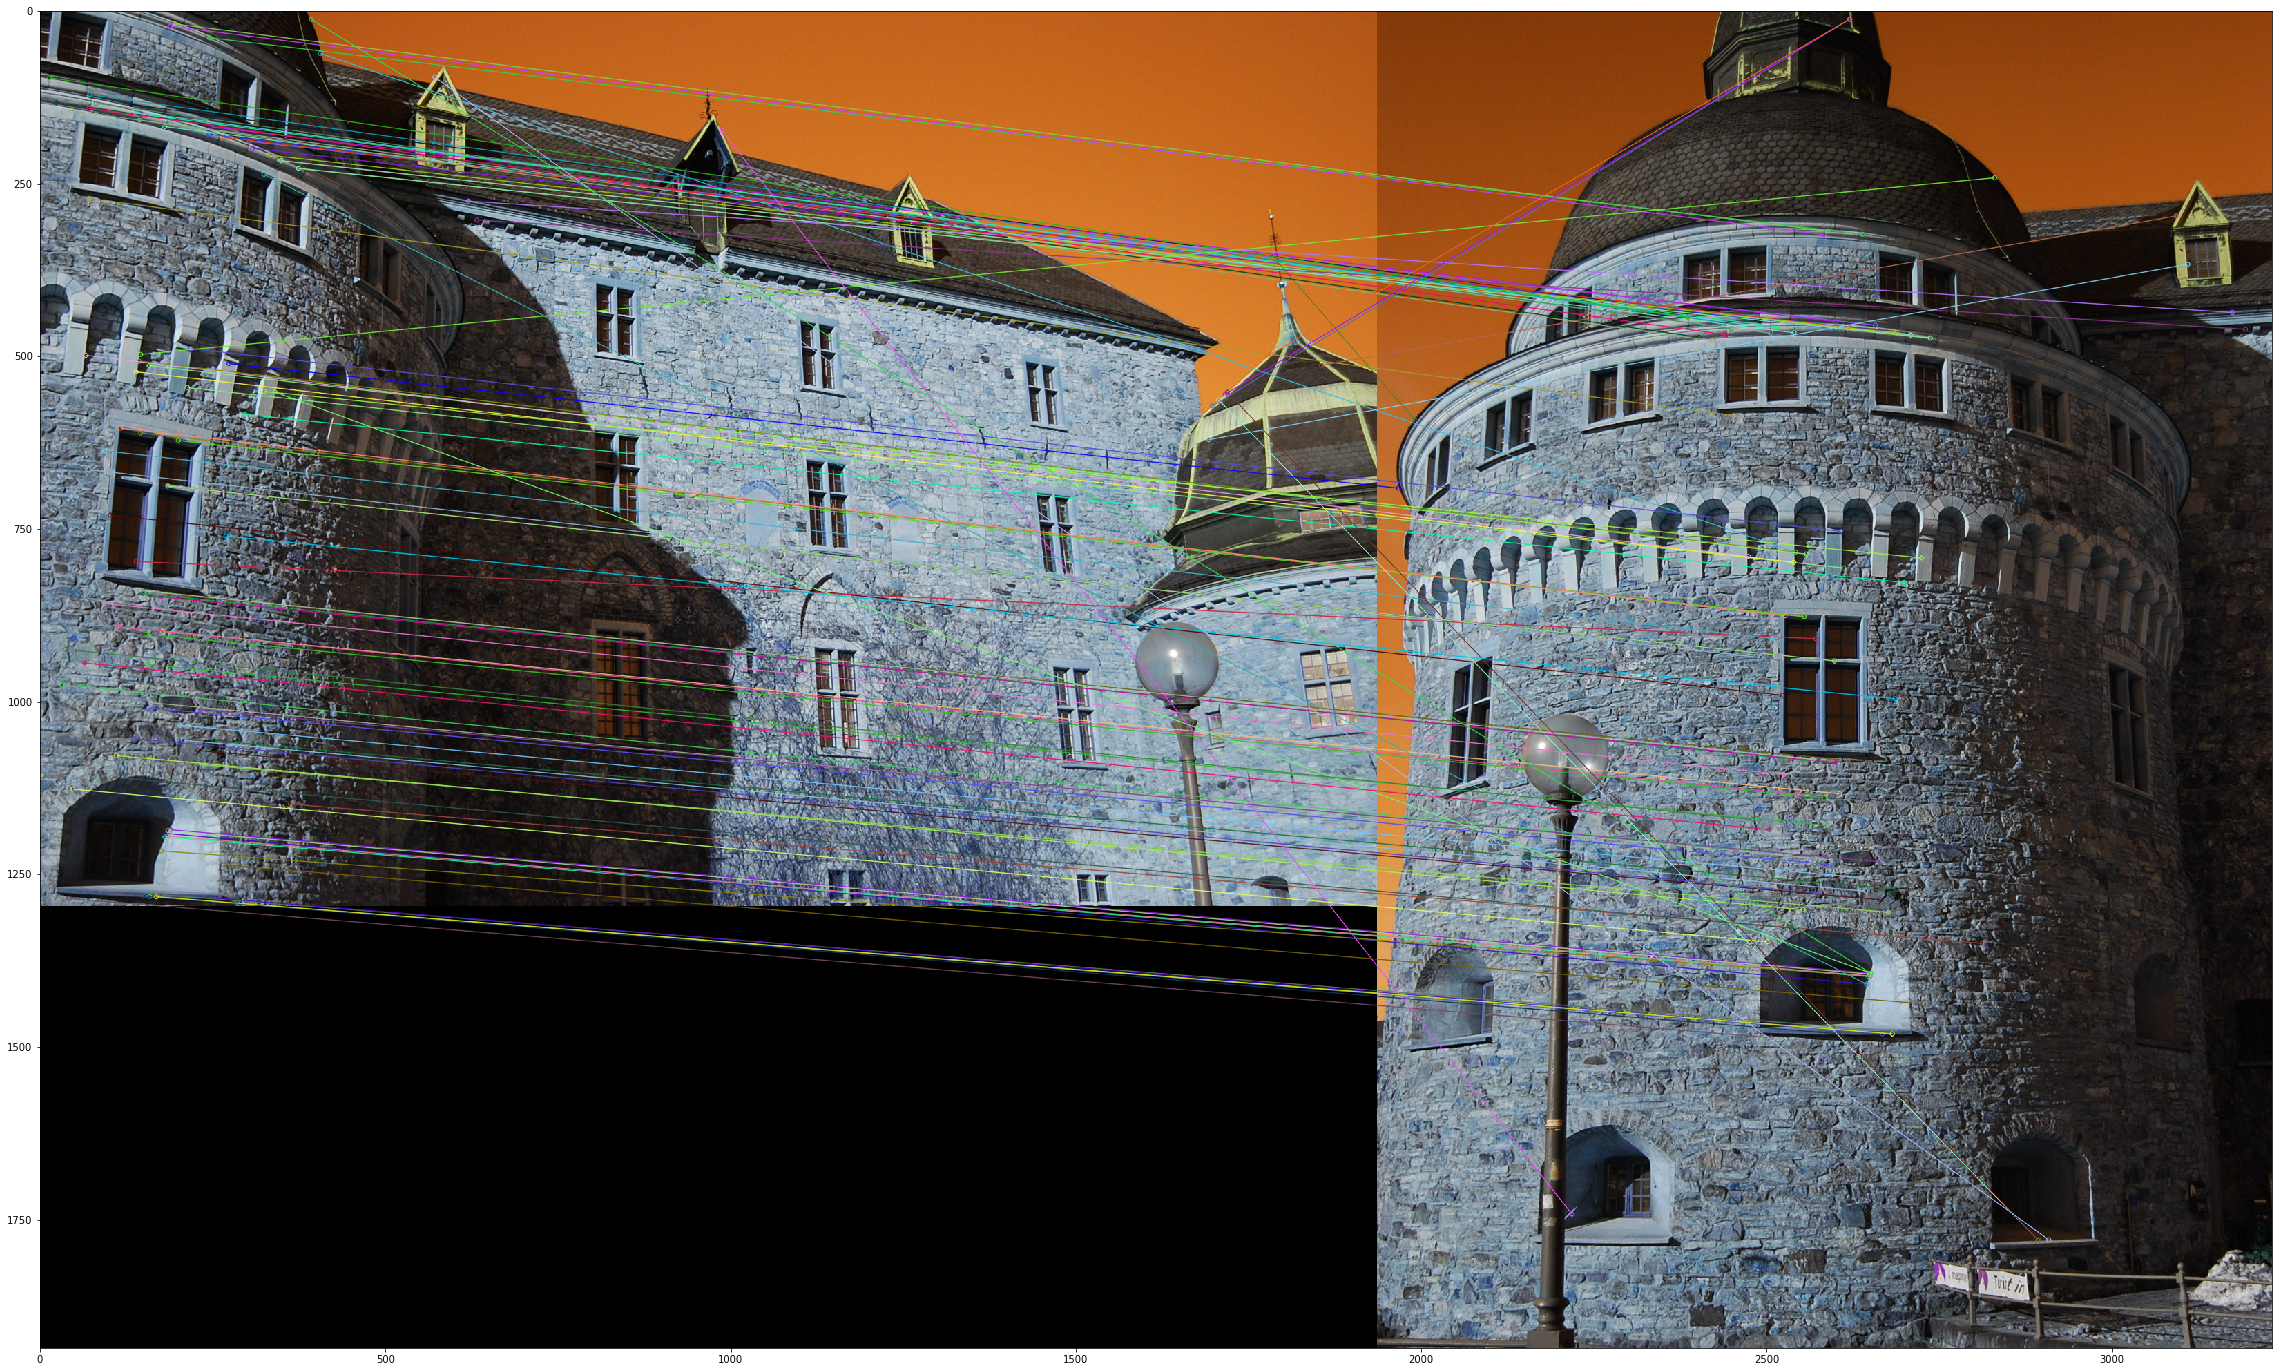

In [23]:
img_matches = cv2.drawMatches(imgA, kpA, imgB, kpB, matches[:100], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(40,30))
plt.imshow(img_matches)